# Introduction

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset

In [19]:
import datetime as dt
import statistics as stat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###### Get the data

In [20]:
nf = pd.read_csv('C:\\data analyst\\Python\\Project\\1. Netflix\\netflix_titles_nov_2019.csv')

###### Inspect data

In [21]:
print(nf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB
None


In [22]:
print(nf.head())

    show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       NaN  November 30

###### Cleaning and preparing data

In [23]:
nf.drop_duplicates(inplace = True)
for i  in range(len(nf)) :
    if nf.loc[i,"date_added"] == np.nan  :
        nf.loc[i,"date_added"] = dt.date(nf.loc[i,"release_year"],1,1)
nf.rename(columns={'listed_in':'category'},inplace= True)
nf["rating"] = nf["rating"].fillna(stat.mode(nf["rating"]))
print(nf.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5837 non-null   object
 8   duration      5837 non-null   object
 9   category      5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 721.9+ KB
None


## Time to explore!

###### See proprotion between number of movies and  TV shows in each year

In [24]:
print("Proportion between movies and TV shows in each year")
type_each_year = nf.groupby("release_year")["type"].value_counts(normalize=True)
print(type_each_year)

Proportion between movies and TV shows in each year
release_year  type   
1925          TV Show    1.000000
1942          Movie      1.000000
1943          Movie      1.000000
1944          Movie      1.000000
1945          Movie      1.000000
                           ...   
2018          Movie      0.605769
              TV Show    0.394231
2019          TV Show    0.544619
              Movie      0.455381
2020          TV Show    1.000000
Name: type, Length: 113, dtype: float64


###### Plot graph to see number of contents in tha data each rating

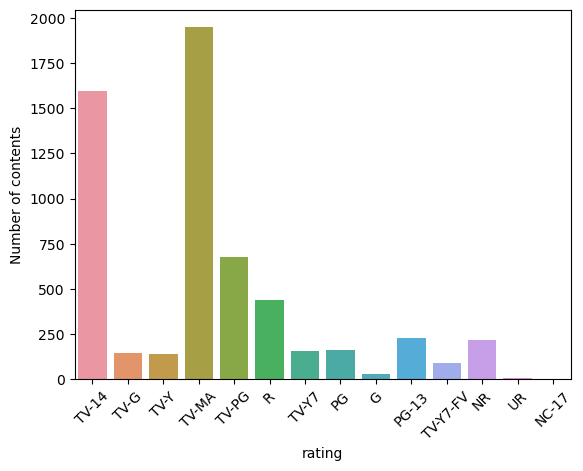

In [25]:
sns.countplot(x="rating",data = nf)
plt.xticks(rotation=45)
plt.ylabel('Number of contents')
plt.show()

###### Top 5 countries that contents in Netflix are made

In [27]:
print('Number of title per country')
group_country = nf.groupby("country")["title"].count().sort_values(ascending=False)
print(group_country[:5])

Number of title per country
country
United States     1907
India              697
United Kingdom     336
Japan              168
Canada             139
Name: title, dtype: int64


###### What is most created content's category in top 5 countries

In [28]:
top_country = ['United States','India','United Kingdom','Japan','Canada']

for i in top_country :
    x = nf[nf["country"] == i]["category"].value_counts(ascending = False)
    print(i)
    print(x[0:3],'\n')

United States
Documentaries               201
Stand-Up Comedy             173
Children & Family Movies     60
Name: category, dtype: int64 

India
Dramas, International Movies                        98
Comedies, Dramas, International Movies              75
Dramas, Independent Movies, International Movies    74
Name: category, dtype: int64 

United Kingdom
Documentaries                                           37
British TV Shows, Docuseries, International TV Shows    25
British TV Shows, Docuseries, Science & Nature TV       17
Name: category, dtype: int64 

Japan
Anime Series, International TV Shows                        53
Action & Adventure, Anime Features, International Movies    25
Anime Series, Kids' TV                                      10
Name: category, dtype: int64 

Canada
Children & Family Movies, Comedies    11
Documentaries                          7
Children & Family Movies               6
Name: category, dtype: int64 



Hope this findings help we get to know more about Netflix'contents